# Dados dos Preços do GLP*

##### *Gás liquefeito de petróleo

### Bibliotecas Utilizadas:

In [1]:
# Manipulação de Dados
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Manipulação de arquivos
import glob

# Ignore Warning
import sys
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Versões dos pacotes utilizados
%reload_ext watermark
%watermark -a 'RH' --iversions

Author: RH

matplotlib: 3.5.1
seaborn   : 0.11.2
sys       : 3.10.5 (tags/v3.10.5:f377153, Jun  6 2022, 16:14:13) [MSC v.1929 64 bit (AMD64)]
pandas    : 1.4.2



In [3]:
font_title = {'family': 'serif',
              'color':  'darkred',
              'weight': 'normal',
              'size': 16,
              }
font_xlabel = {'family': 'serif',
              'color':  'black',
              'weight': 'normal',
              'size': 14,
              }
font_ylabel = {'family': 'serif',
              'color':  'black',
              'weight': 'normal',
              'size': 14,
              }                            

### Coletando e salvando os dados:

In [4]:
df_01 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-glp-01.csv', sep=';')
df_01.to_csv('./data/JAN-2022.csv', sep=';')
df_02 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-glp-02.csv', sep=';')
df_02.to_csv('./data/FEV-2022.csv', sep=';')
df_03 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-glp-03.csv', sep=';')
df_03.to_csv('./data/MAR-2022.csv', sep=';')
df_04 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-glp-04.csv', sep=';')
df_04.to_csv('./data/ABR-2022.csv', sep=';')


# df_01 = representa o mês de janeiro de 2022
# df_02 = representa o mês de fevereiro de 2022
# df_03 = representa o mês de março de 2022
# df_04 = representa o mês de abril de 2022

### Carregando a base de dados:

In [5]:
# Unindo os dados dos meses de 2022(Até Abril), em apenas um DataFrame
extensao = 'csv'

arquivos_csv = [i for i in glob.glob(f'./data/*.{extensao}')]
data_glp = pd.concat([pd.read_csv(f, sep=';') for f in arquivos_csv])

In [6]:
# Eliminando algumas colunas
data_glp.drop(['Revenda',
           'Unnamed: 0',
           'CNPJ da Revenda',
           'Nome da Rua','Numero Rua',
           'Complemento',
           'Bairro',
           'Cep',
           'Valor de Compra'], axis=1, inplace=True)
        
data_glp.head()           

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,S,SC,JARAGUA DO SUL,GLP,01/04/2022,"114,99",R$ / 13 kg,NACIONAL GÁS BUTANO
1,S,SC,JARAGUA DO SUL,GLP,01/04/2022,"114,99",R$ / 13 kg,ULTRAGAZ
2,S,SC,JARAGUA DO SUL,GLP,01/04/2022,"114,99",R$ / 13 kg,NACIONAL GÁS BUTANO
3,SE,SP,SERTAOZINHO,GLP,01/04/2022,115,R$ / 13 kg,ULTRAGAZ
4,SE,SP,BIRIGUI,GLP,01/04/2022,113,R$ / 13 kg,SUPERGASBRAS ENERGIA


In [7]:
# Verificando o nome das colunas
data_glp.columns

Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Produto',
       'Data da Coleta', 'Valor de Venda', 'Unidade de Medida', 'Bandeira'],
      dtype='object')

In [8]:
# Verificando o tamanho do DataFrame(linhas x colunas)
data_glp.shape

(63873, 8)

In [9]:
# Tipo dos dados das colunas
print(data_glp.dtypes)

data_glp['Valor de Venda'] = data_glp['Valor de Venda'].str.replace(',','.') # Alterando de virgula para ponto
data_glp['Valor de Venda'] = data_glp['Valor de Venda'].apply(pd.to_numeric) # Alterando o tipo da coluna 

print('-----')
print(data_glp.dtypes)

Regiao - Sigla       object
Estado - Sigla       object
Municipio            object
Produto              object
Data da Coleta       object
Valor de Venda       object
Unidade de Medida    object
Bandeira             object
dtype: object
-----
Regiao - Sigla        object
Estado - Sigla        object
Municipio             object
Produto               object
Data da Coleta        object
Valor de Venda       float64
Unidade de Medida     object
Bandeira              object
dtype: object


### Verificando a Distribuição da Variável - Valor de Venda

In [10]:
data_glp.describe()

,Valor de Venda
count,63873.000000
mean,108.185146
std,10.938520
min,78.000000
25%,100.000000
50%,108.000000
75%,115.000000
max,160.000000


Text(0.5, 1.0, 'Histograma do Preço(Valor de Venda) do GLP')

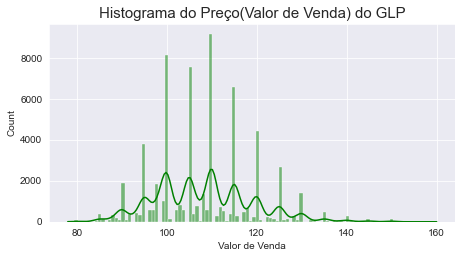

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))

plt.subplot(221)
sns.histplot(data_glp['Valor de Venda'], kde=True, color='green')
plt.title('Histograma do Preço(Valor de Venda) do GLP', fontsize=15)

#### Agrupando os dados por região e calculando a média

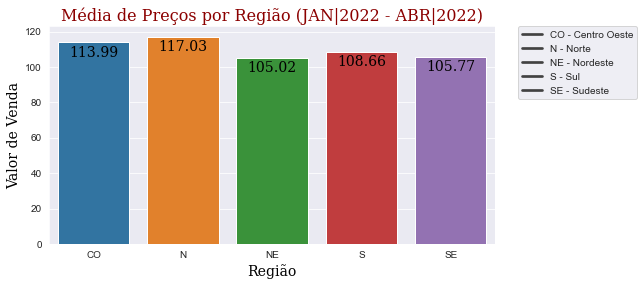

In [10]:
data_group_regiao = round(data_glp.groupby(['Regiao - Sigla']).mean(),2)
data_group_regiao = data_group_regiao.rename_axis('Regiao - Sigla').reset_index()

sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.barplot(data=data_group_regiao, x='Regiao - Sigla', y='Valor de Venda')
plt.title('Média de Preços por Região (JAN|2022 - ABR|2022)', fontdict=font_title)
plt.xlabel('Região', fontdict=font_xlabel)
plt.ylabel('Valor de Venda', fontdict=font_ylabel)
plt.legend(['CO - Centro Oeste','N - Norte','NE - Nordeste','S - Sul','SE - Sudeste'], 
                bbox_to_anchor=(1.05, 1),
                loc='upper left', 
                borderaxespad=0.)
for x,y in enumerate(data_group_regiao['Valor de Venda']):
    plt.text(x,y-8,'%s'%round(y,2),ha='center', fontdict=font_xlabel)               
plt.show()

media_preco_br = data_glp['Valor de Venda'].mean()

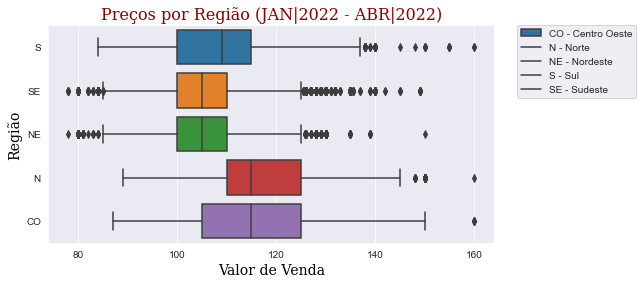

In [11]:
data_regiao = data_glp[['Regiao - Sigla','Valor de Venda']]

sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.boxplot(data=data_regiao, y='Regiao - Sigla', x='Valor de Venda')
plt.title('Preços por Região (JAN|2022 - ABR|2022)', fontdict=font_title)
plt.xlabel('Valor de Venda', fontdict=font_xlabel)
plt.ylabel('Região', fontdict=font_ylabel)
plt.legend(['CO - Centro Oeste','N - Norte','NE - Nordeste','S - Sul','SE - Sudeste'], 
                bbox_to_anchor=(1.05, 1),
                loc='upper left', 
                borderaxespad=0.)             
plt.show()